In [2]:
import numpy as np
import h5py as h5
import os
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def fetch_acq_files(user_name, acquistion_folder, device_name):
    path_name = os.path.join('~', 'Desktop', 'acqBIT')   
    path = os.path.expanduser(os.path.join(path_name, user_name, acquisition_folder,device_name))
    list_files = os.listdir(path)
    acq_files = [os.path.join(path, path_file)  for path_file in list_files if '.h5' in path_file]
    return acq_files


def fetch_acq_prof_files(user_name, acquistion_folder, device_name):
    path_name = os.path.join('~', 'Desktop', 'acqBIT')   
    path = os.path.expanduser(os.path.join(path_name, user_name, acquisition_folder,device_name))
    list_files = os.listdir(path)
    acq_files = [os.path.join(path, path_file)  for path_file in list_files if '.txt' in path_file]
    return acq_files


def get_channel_from_files(acq_files, channel_name):
    channels = []
    for file_path in acq_files:
        with h5.File(file_path, 'r') as f:
            r_group = f[f.keys()[0]]
            channel = r_group[channel_name][:]
            channels.append(channel)
    return channels

# Long-term acquisiton characterization

In order to attest the efficiency and ultmately the efficieny of the acqBIT app, this notebook is intended to analyse the data 

# 1. Missing Samples Characterization

An important aspect to evaluate long-term acquisition is the characterization of missing samples. Theoretically, missing samples are the result of time-wise expensive computation between reads from the BITalino device. 

On the acquisition computer, the process of long term-acquisition can be seen essentialy conceptualized as single continuos loop that, in each iteration, reads data from device and performs <font color=red>additional computation</font>.

A single process on, implemented in the computer by *python-AcqBIT/bitalino_process.py* is associated with a single device, and thus a single *macAddress*.
Depending on the configuration variable *nSamples*, which controls the number of samples to retrieve from device in each read, the process waits the necessary span of time in order to fully retrieve the number of samples specified, an interval which is, of course, a function of the configuration variable *samplingRate*. And then, once recieval is finished, the aditional computation can proceed.

On the BITalino device, once the acquisition is started, the continuous sampling of each channel maintains a constant flow of data streaming from the CPU to the Bluetooth Module. Once the sampled data arrives at the module, it is temporarily stored in a buffer awaiting transmission via radio waves, which is initated by a signal of acceptance comming from the acquisition computer (in this instance, by the function *read*). The size of the buffer is determinant in the quantification of missing samples.

### 1.1. Analysis of the *nSeq* channel

A useful information provided from the bitalino device is the number of sequence, which is coded in the acquisition file as *nSeq*

#### 1.1.a) <font color=green>  HP Omen - Windows 10 x64 -  2 Devices acquisition (6 analog channels each) - High performance computer - 10 Hours acquisiton</font>

In [4]:
# Fetch created directory
user_name = 'New User'
acquisition_folder = 'NOTEBOOK TEST'
device_name = 'VR EDA'
acq_files = fetch_acq_files(user_name, acquisition_folder, device_name)

# Get sequence number for acquisition
channel_name = 'raw/nSeq'
nseq_channels = get_channel_from_files(acq_files, channel_name)

In [5]:
for nseq in nseq_channels:
    nseq = nseq[:, 0].astype(np.int16)
    print nseq
    d_nseq = np.diff(nseq)
    print np.unique(d_nseq)

[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]


In [6]:
# Fetch created directory
user_name = 'New User'
acquisition_folder = 'NOTEBOOK TEST'
device_name = 'VR EDA'
acq_files = fetch_acq_files(user_name, acquisition_folder, device_name)

# Get sequence number for acquisition
channel_name = 'raw/nSeq'
nseq_channels = get_channel_from_files(acq_files, channel_name)

In [7]:
for nseq in nseq_channels:
    nseq = nseq[:, 0].astype(np.int16)
    print nseq
    d_nseq = np.diff(nseq)
    print np.unique(d_nseq)

[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]
[ 0  1  2 ... 13 14 15]
[-15   1]


## 1.2. Analysis of the time between each read

Another type of useful information for missing samples evaluation, is quantification of the time between reads. Fortunately, the application AcqBIT provides such profiling information in the separate acquisition files.

In [12]:
# Fetch created directory
user_name = 'New User'
acquisition_folder = 'NOTEBOOK TEST'
device_name = 'VR EDA'
acq_profiling_files = fetch_acq_prof_files(user_name, acquisition_folder, device_name)


files_prof_list = []
for file_path in acq_profiling_files:
    prof = []
    with open(file_path) as w:
        prof_loop_iter = []
        for line in w:
            prof_loop_iter.append(line)
    files_prof_list.append(prof)

## 1.3. Module Synchronization test

In order to evaluate the multiple device synchronization capabilities offered by the python-AcqBIT app, one should load the last 2 output digital channels from the arbiterarely defined 'master' device and the 2 input digital channels from the connected slave devices. 

Then an analysis of the sample difference between the change of states, should indicate the phase difference between devices, which should be function of the intial time of acquistion, number of missing samples, and the skewness of device processor clock.

In [16]:
# get master device
user_name = 'New User'
acquisition_folder = 'NOTEBOOK TEST'
device_name = 'VR EDA'
acq_files = fetch_acq_files(user_name, acquisition_folder, device_name)

channel_name = 'digital/digital_3'
digital_channel = get_channel_from_files(acq_files, channel_name)

channel_name = 'events/digital'
events_digital_channel = get_channel_from_files(acq_files, channel_name)

In [17]:
events_digital_channel[0]

[array([[1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1

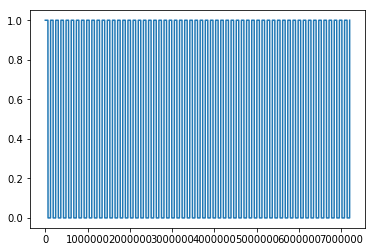

In [22]:
plt.figure()
plt.plot(digital_channel[0])

In [25]:
# get master device
user_name = 'New User'
acquisition_folder = 'NOTEBOOK TEST'
device_name = 'module B'
acq_files = fetch_acq_files(user_name, acquisition_folder, device_name)

channel_name = 'digital/digital_1'
digital_channel = get_channel_from_files(acq_files, channel_name)

channel_name = 'events/digital'
events_digital_channel = get_channel_from_files(acq_files, channel_name)

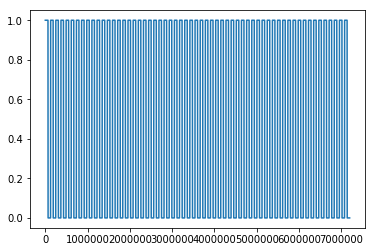

In [26]:
plt.figure()
plt.plot(digital_channel[0])